In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-26 02:26:46.784750: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:26:46.835005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 02:26:46.835128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 02:26:46.837251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 02:26:46.847934: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 02:26:46.848989: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Data Cleaning

In [2]:
#CLEANING my dataset. Only need to do this once. Will do this for my training and test datasets (Not shown bc i didnt want to write the code twice).
#import os

labels = ["squamous.cell.carcinoma", "normal", "adenocarcinoma", "large.cell.carcinoma"]
#num_skipped = 0
#max_items = 200 #Raising max images to 200. Unzipping my files gives me a "zone identifier" for each image. Doing this to counter that.

#for folder_name in labels:
 #   folder_path = os.path.join('archive (13)/Data/valid/', folder_name) #I just changed the path for train/test/valid
#    for image_i,fname in enumerate(os.listdir(folder_path)):
  #      fpath = os.path.join(folder_path, fname)
        
  #      try:
  #           fobj = open(fpath, "rb")
       #      is_png = b'\x89PNG\r\n\x1a\n' in fobj.peek(10)
   #     finally:
       #      fobj.close()
             
    #    if image_i > max_items or not is_png:
       #     num_skipped += 1
             #Delete corrupted image
          #  os.remove(fpath)

        #image_count += 1

#print(f"Deleted {num_skipped} images.") #Deleted 822 items in training set, and 334 items in my test. Includes ZI

In [3]:
#print(f"Deleted {num_skipped} images.") #Deleted 72 items from my validation set. Includes zone identifiers.

## Data gens

In [4]:
#augmented_datagen = ImageDataGenerator(
 #   rescale=1./255, #Normalizing
  #  rotation_range=5,
#    width_shift_range=0.2
 #   height_shift_range=0.2,
  #  horizontal_flip=True,
   # vertical_flip=True,    #These steps applied only to training data to help model learn to generalize
#    fill_mode='nearest',    #Augmentation may not be applicable to my dataset
#    shear_range=0.3,
#    channel_shift_range=0.3,
#    zoom_range=0.3,
#    brightness_range=[0.8, 1.2])

train_datagen = ImageDataGenerator(rescale=1./255) #Applying normalization, here.
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#augmented_dataset  = augmented_datagen.flow_from_directory(directory = 'archive (13)/Data/train/',
                                                 #  target_size = (100,100),
                                                 #  class_mode = 'categorical',
                                                 #  batch_size = 128) 
train_dataset  = train_datagen.flow_from_directory(directory = 'archive (13)/Data/train/',
                                                   target_size = (100,100),
                                                   class_mode = 'categorical',
                                                   batch_size = 128) 
valid_dataset = valid_datagen.flow_from_directory(directory = 'archive (13)/Data/valid/', #flow_from_directory is from keras.
                                                  target_size = (100,100),#my data is already in subdirectories, so this keras function works for me!
                                                  class_mode = 'categorical',
                                                  batch_size = 128)
test_dataset = test_datagen.flow_from_directory(directory = 'archive (13)/Data/test/',
                                                  target_size = (100,100),  #Setting images to 100x100 pixels
                                                  class_mode = 'categorical',
                                                  batch_size = 128) #Creating generators for each dataset, here.

Found 404 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 296 images belonging to 4 classes.


## Visuals

In [6]:
def get_ds_size(folder_path):
    num_of_images = {} 
    for folder in os.listdir(folder_path): #Needed a method to count the distribution of my classes.
        num_of_images[folder] = len(os.listdir(os.path.join(folder_path, folder)))
    return num_of_images

test_set = get_ds_size('archive (13)/Data/train/')
train_set = get_ds_size('archive (13)/Data/test/')
val_set = get_ds_size('archive (13)/Data/valid/')

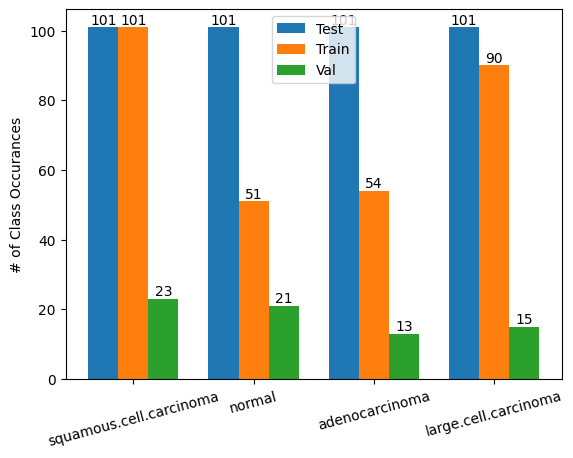

In [7]:
#labels = ["squamous.cell.carcinoma", "normal", "adenocarcinoma", "large.cell.carcinoma"]

test_list = list(test_set.values()) #To visualize class dist. across my three datasets.
train_list = list(train_set.values())
val_list = list(val_set.values())

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
test_bar = ax.bar(x - width, test_list, width, label="Test")
train_bar = ax.bar(x, train_list, width, label="Train")
val_bar = ax.bar(x + width, val_list, width, label="Val")

ax.set_ylabel('# of Class Occurances')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
ax.bar_label(test_bar)
ax.bar_label(train_bar)
ax.bar_label(val_bar)

plt.show() #Got 101 images instead of sub 100. oop

In [8]:
def show_images(gen):
    
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes)
    images, labels = next(gen)        # get a batch size samples from the generator
    plt.figure(figsize= (20, 20))
    length = len(labels)              # length of batch size
    sample = min(length, 25)          # check if sample less than 25 images
    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] #modified this. used to rescale data, but mine is already scaled...
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

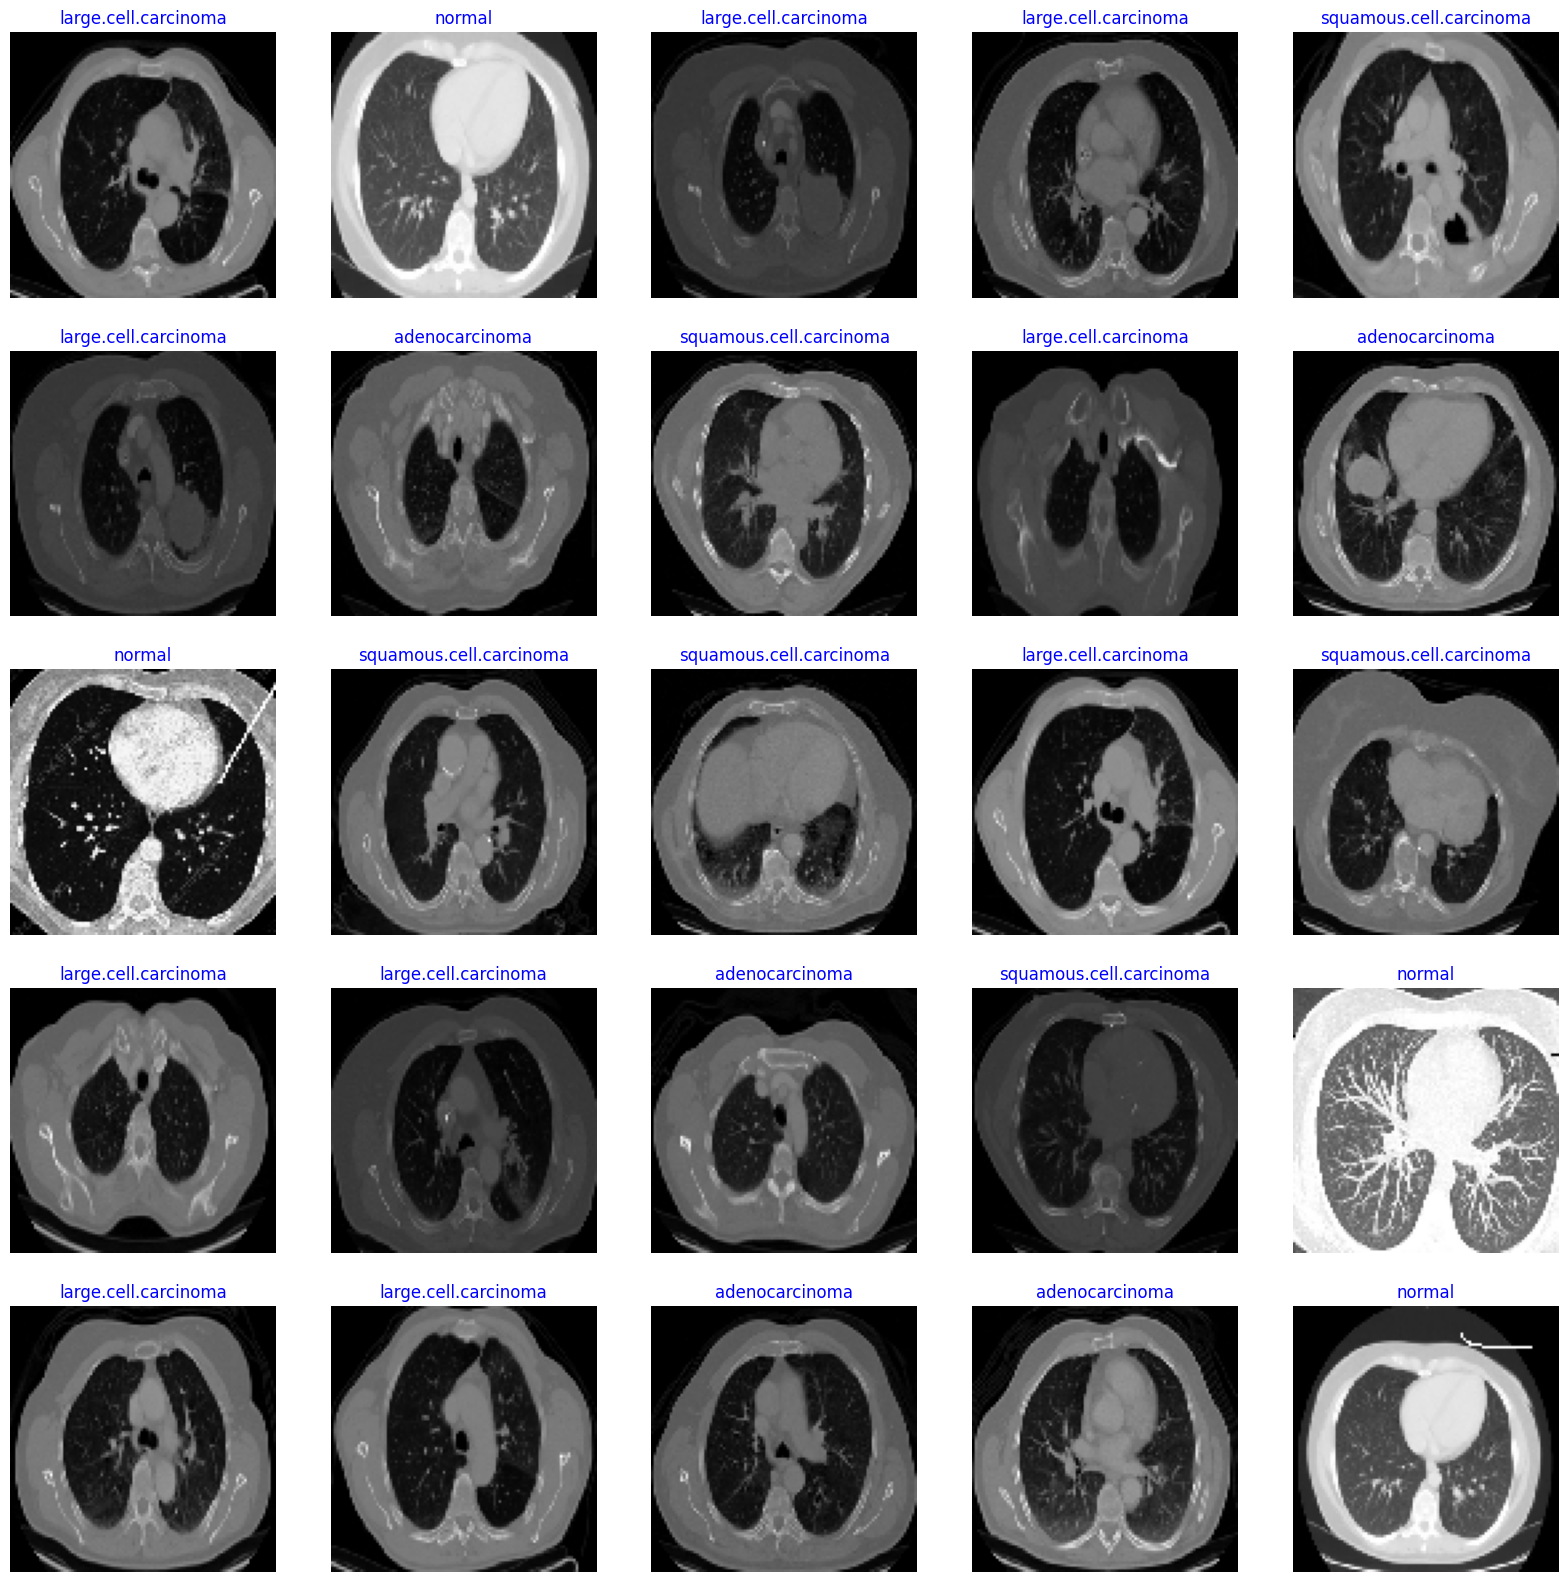

In [9]:
show_images(train_dataset) #Data loader is working properly.

In [ ]:
# I'm noticing some potential duplicate images that I didn't see before I shrank my dataset.

In [ ]:
#Some images look like already augmented versions of the same CT scan...